# Summary of cleaned FracFocus data
This notebook accesses the data that was cleaned and compiled in the FF-POC project. Presented here are some big-picture statistics of this cleaned set.  

In [1]:
# Preamble to set up for analysis and graphics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.ticker

results_dir = './out/'      # for local use
#results_dir = '../results/' # for CodeOcean

In [2]:
# pull data from the results directory where it is stored as a .csv file

df = pd.read_csv(results_dir+'filtered_df.csv')
df.date = pd.to_datetime(df.date)  # put date back into datetime format

# Number of Fracking Events
Plot the number of fracking 'events' (that is, unique disclosures) in the cleaned data.

## By year

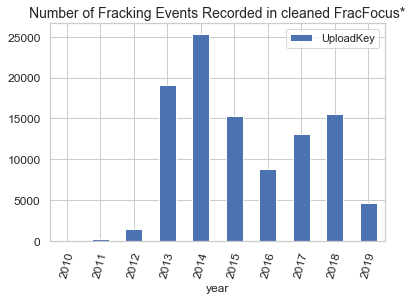

In [21]:
df['year'] = df.date.dt.year
gb =df.groupby(['year','UploadKey'],as_index=False)['CASNumber'].count()
gb2 = gb.groupby('year',as_index=False)['UploadKey'].count()
ax=gb2.plot.bar('year','UploadKey');
ax.tick_params(axis="x", labelsize=12,rotation=75)
ax.tick_params(axis="y", labelsize=12)
plt.title('Number of Fracking Events Recorded in cleaned FracFocus*',fontsize=14);

*Note that this represents a FracFocus bulk download from June 25, 2019, and therefore 2019 is a partial year. 
Note also that ALL events of Version 1 of FracFocus are not included in the bulk download.  Although one can download individual pdfs from FracFocus.org for events between 2011 and 2013, many of those are not included in the data analyzed here.

## By State
Show the number of fracking events by State, sorted by frequency

In [4]:
gb =df.groupby(['bgStateName','UploadKey'],as_index=False)['bgCAS'].count()
gb2 = gb.groupby('bgStateName',as_index=False)['UploadKey'].count() 
gb2.sort_values('UploadKey',ascending=False)
gb3 = df.groupby(['bgStateName'],as_index=False)['bgCAS'].count()
mg = pd.merge(gb2,gb3,on='bgStateName',how='left')
mg.columns = ['State','Num_Events','Num_Chemical_Records']
mg.sort_values('Num_Events',ascending=False)

,State,Num_Events,Num_Chemical_Records
23,texas,49397,1547670
21,oklahoma,10902,312994
4,colorado,9754,265852
19,north dakota,8308,239964
22,pennsylvania,5115,118587
17,new mexico,3909,114587
27,wyoming,3174,80514
24,utah,2789,89209
3,california,2409,57998
20,ohio,2026,49503


# Water Use

All fracking events in the **filtered** data set use water as the carrier or base fluid.  Here we report the range of volumes (in gallons) across the entire, filtered data set.  

Note that because the range of volumes spans several orders of magnitude, we present the summary data in **log base 10** format.  Many other data fields in FracFocus have a similarly large range and so are also plotted on log scales.

Whiskers at 1 and 99%


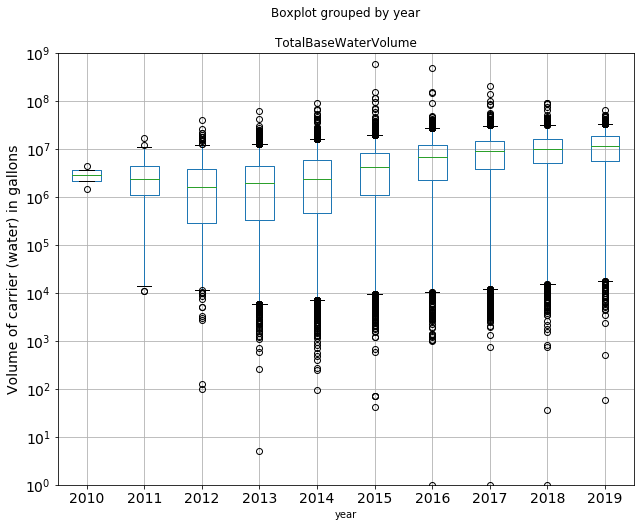

In [5]:
t = df.groupby('UploadKey',as_index=False)['TotalBaseWaterVolume','bgStateName','year'].first() # only need one from each event
ax = t.boxplot(by='year',column=['TotalBaseWaterVolume'],whis=[1,99],figsize=(10,8));
ax.set(yscale='log')
ax.set(ylim=(1,1000000000))
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
plt.ylabel('Volume of carrier (water) in gallons',fontsize=14);
locmaj = matplotlib.ticker.LogLocator(base=10,numticks=12) 
ax.yaxis.set_major_locator(locmaj)
print('Whiskers at 1 and 99%')

For many events in the FracFocus data, no value is reported in the field 'TotalBaseWaterVolume' or a zero is reported.  Without that information, we are unable to calculate the mass for any of the chemicals in that event.

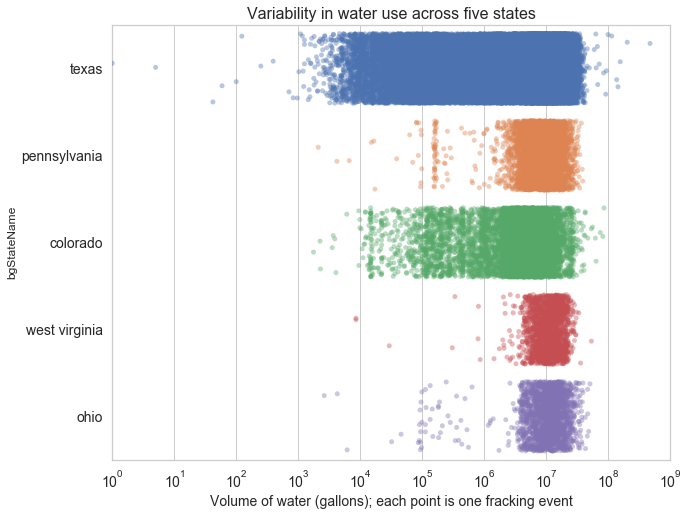

In [6]:
sns.set(style="whitegrid")
states = ['ohio','west virginia','pennsylvania','colorado','texas']
t = t[t.bgStateName.isin(states)]
fig = plt.figure(figsize=(10,8))
ax = sns.stripplot(t.TotalBaseWaterVolume,t.bgStateName,jitter=.4, alpha=0.4)
ax.set(xscale='log')
ax.set(xlim=(1,1000000000))
plt.title('Variability in water use across five states',fontsize=16);
plt.xlabel('Volume of water (gallons); each point is one fracking event',fontsize=14);
locmaj = matplotlib.ticker.LogLocator(base=10,numticks=10) 
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
ax.xaxis.set_major_locator(locmaj)

Although not shown here, water use for the 2011-2013 years is available in the raw data set.  Many of the 'empty events' of FFVersion 1 have values for TotalBaseWaterVolume.  While these events are filtered out of the data set analyzed here, they are available in the 'full_df.csv'.

# Chemical lists

## Most frequently used
Note that a given CAS number can occur more than once in a given event (for example, water may have a record for each product that it is in).  

In [7]:
gb = df.groupby('bgCAS',as_index=False)['CASNumber'].count()
ing = df.groupby('bgCAS',as_index=False)['bgIngredientName'].first()
gb = pd.merge(ing,gb,on='bgCAS',how='right',validate='1:1')
gb.columns = ['CAS number','ingredient name','frequency']
gb.sort_values('frequency',ascending=False).head(50)

,CAS number,ingredient name,frequency
1151,cas_unresolved,name_unresolved,623266
970,7732-18-5,water,300456
265,14808-60-7,quartz (sio2),154677
692,67-56-1,methanol,115669
654,64742-47-8,"distillates (petroleum), hydrotreated light",96968
942,7647-01-0,hydrochloric acid,75972
693,67-63-0,2-propanol,60169
943,7647-14-5,sodium chloride (nacl),59239
57,107-21-1,"1,2-ethanediol",50718
1070,9000-30-0,guar gum,44389


## Largest by total mass
This is the total mass (in pounds) recorded in the filtered FracFocus set.

In [8]:
gb = df.groupby('bgCAS',as_index=False)['bgMass'].sum()
ing = df.groupby('bgCAS',as_index=False)['bgIngredientName'].first()
gb = pd.merge(ing,gb,on='bgCAS',how='right',validate='1:1')
gb.columns = ['CAS number','ingredient name','total mass (lbs.)']
gb.sort_values('total mass (lbs.)',ascending=False).head(50)

,CAS number,ingredient name,total mass (lbs.)
970,7732-18-5,water,4.486831e+12
265,14808-60-7,quartz (sio2),5.245133e+11
942,7647-01-0,hydrochloric acid,5.520176e+09
1151,cas_unresolved,name_unresolved,4.840504e+09
654,64742-47-8,"distillates (petroleum), hydrotreated light",1.894452e+09
182,1302-93-8,mullite (al6o5(sio4)2),1.764411e+09
1070,9000-30-0,guar gum,1.620962e+09
223,1344-28-1,aluminum oxide (al2o3),1.095235e+09
967,7727-37-9,nitrogen,9.945661e+08
685,66402-68-4,"ceramic materials and wares, chemicals",9.744428e+08


## largest by average mass
Some chemicals are not used frequently, but when they are used, it is in large quantity

In [9]:
gb = df.groupby('bgCAS',as_index=False)['bgMass'].mean()
ing = df.groupby('bgCAS',as_index=False)['bgIngredientName'].first()
gb = pd.merge(ing,gb,on='bgCAS',how='right',validate='1:1')
gb.columns = ['CAS number','ingredient name','average mass (lbs.)']
gb.sort_values('average mass (lbs.)',ascending=False).head(50)
#gb.sort_values('average mass',ascending=False)[:10].plot.barh('ingredient name','average mass')

,CAS number,ingredient name,average mass (lbs.)
970,7732-18-5,water,1.639133e+07
265,14808-60-7,quartz (sio2),3.683277e+06
685,66402-68-4,"ceramic materials and wares, chemicals",3.325743e+06
900,7440-21-3,silicon,1.706756e+06
204,1318-16-7,bauxite,1.658519e+06
498,50-28-2,"estra-1,3,5(10)-triene-3,17-diol (17î²)-",1.086665e+06
221,1343-88-0,"silicic acid, magnesium salt",9.672456e+05
182,1302-93-8,mullite (al6o5(sio4)2),8.556795e+05
209,1327-36-2,aluminatesilicate,7.065378e+05
967,7727-37-9,nitrogen,6.683912e+05


## What is the mass of those chemicals claimed as "Proprietary?"

The 'proprietary' designation in this data set includes many terms used in the CAS field name such as 'proprietary,' 'confidential,' 'trade secret,' and numerous spelling variations of those items.  See the file in the data section named: cas_labels.csv for a full list.

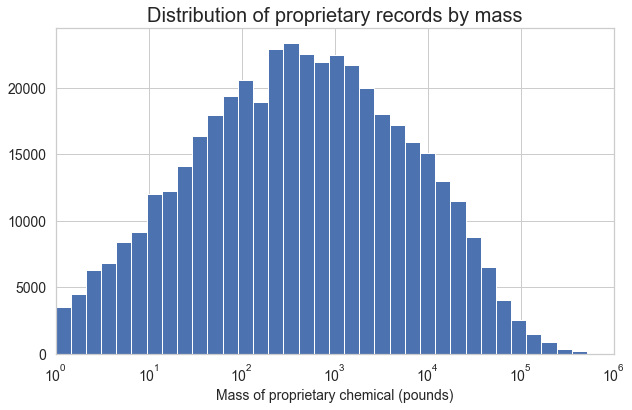

In [10]:
df['mlog'] = np.where(df.bgMass>0,np.log10(df.bgMass+1),np.NaN)
sns.set(style="whitegrid")
fig = plt.figure(figsize=(10,6))

MIN, MAX = 1, 100000000
bins = 10 ** np.linspace(np.log10(MIN), np.log10(MAX), 50)
ax = df[(df.record_flags.str.contains('3'))&(~df.mlog.isna())].bgMass.hist(bins=bins)
ax.set(xscale='log')
ax.set(xlim=(1,1000000))
plt.xlabel('Mass of proprietary chemical (pounds)',fontsize=14);
plt.title('Distribution of proprietary records by mass',fontsize=20);
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
locmaj = matplotlib.ticker.LogLocator(base=10,numticks=9) 
ax.xaxis.set_major_locator(locmaj)


## How big do they get?

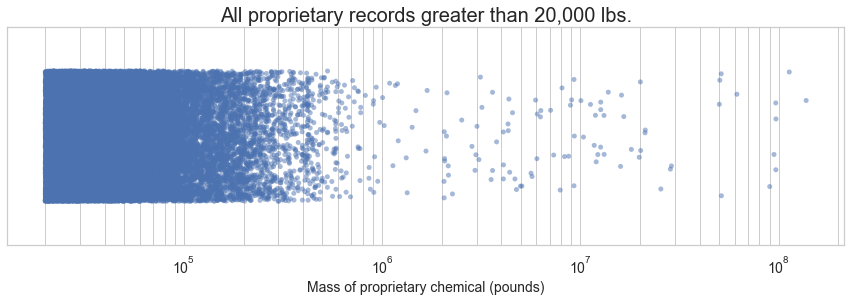

In [11]:
fig = plt.figure(figsize=(15,4))
# ax = sns.stripplot(df[(df.record_flags.str.contains('3'))&(df.bgMass>20000)].mlog,jitter=.3,alpha=.5)
ax = sns.stripplot(df[(df.record_flags.str.contains('3'))&(df.bgMass>20000)].bgMass,jitter=.3,alpha=.5)
ax.set(xscale='log')
plt.xlabel('Mass of proprietary chemical (pounds)',fontsize=14);
plt.title('All proprietary records greater than 20,000 lbs.',fontsize=20);
ax.tick_params(axis="x", labelsize=14)
locmaj = matplotlib.ticker.LogLocator(base=10,numticks=7,subs='all') 
ax.xaxis.set_major_locator(locmaj)


In [12]:
t = len(df[(df.mlog>5)&(df.record_flags.str.contains('3'))])
print(f'Number of Proprietary records with mass >100,000 lbs.: {t}')

Number of Proprietary records with mass >100,000 lbs.: 3912


# Case study:  2-butoxyethanol  or 2-BE  (CAS 111-76-2)
In this section, I illustrate some of the detail that is available to use in the filtered data set

## Overall frequency of use

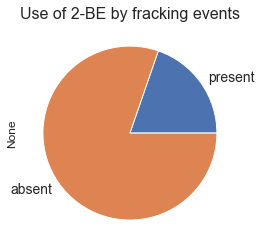

In [13]:
df2be = df[df.bgCAS=='111-76-2'].copy()
totEv = len(df.UploadKey.unique())
pres2BE = len(df2be.UploadKey.unique())
ax = pd.Series({'present':pres2BE,'absent':totEv-pres2BE}).plot.pie(fontsize=14);
plt.title('Use of 2-BE by fracking events',fontsize=16);

## Most frequent users of 2-BE

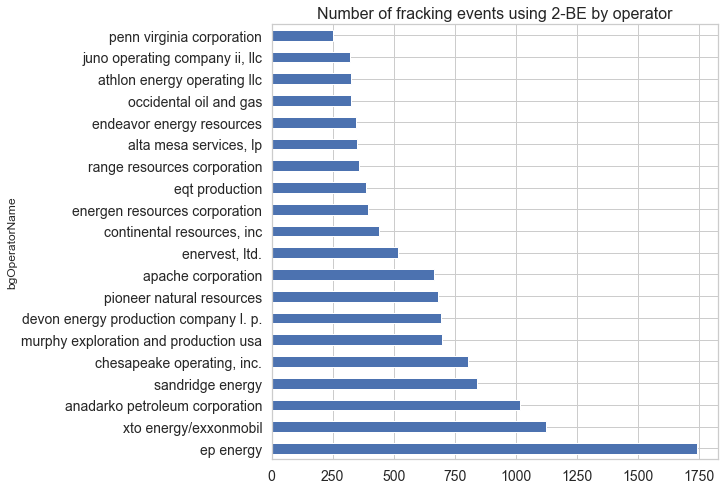

In [15]:
ax = df2be.groupby('bgOperatorName')['UploadKey'].count()\
     .sort_values(ascending=False)[:20].plot.barh(figsize=(8,8));
ax.tick_params(axis="y", labelsize=14)
ax.tick_params(axis="x", labelsize=14)
plt.title('Number of fracking events using 2-BE by operator',fontsize=16);


## Most frequent Suppliers of 2-BE
Note that in one mode of data entry called 'System Approach' used in FFVersion 3, supplier names as well as the product names are disconnected from the chemical record.

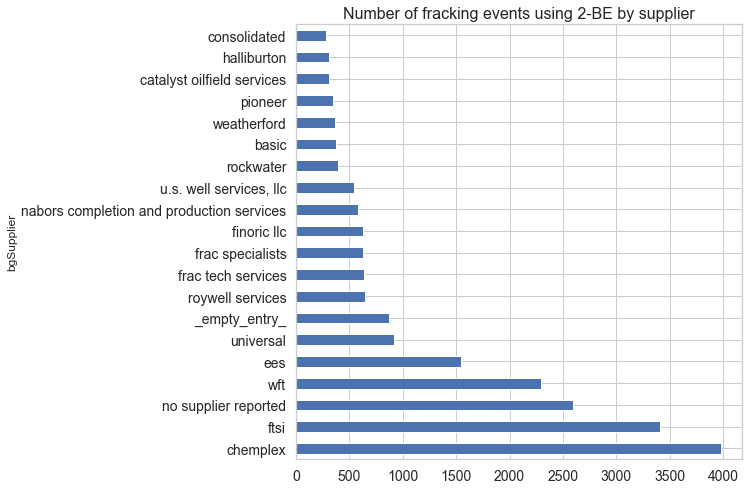

In [16]:
ax = df2be.groupby('bgSupplier')['UploadKey'].count()\
     .sort_values(ascending=False)[:20].plot.barh(figsize=(8,8));
ax.tick_params(axis="y", labelsize=14)
ax.tick_params(axis="x", labelsize=14)
plt.title('Number of fracking events using 2-BE by supplier',fontsize=16);


## Total mass by operator
That is, the total amount of 2-BE used by these operators over all their disclosures.

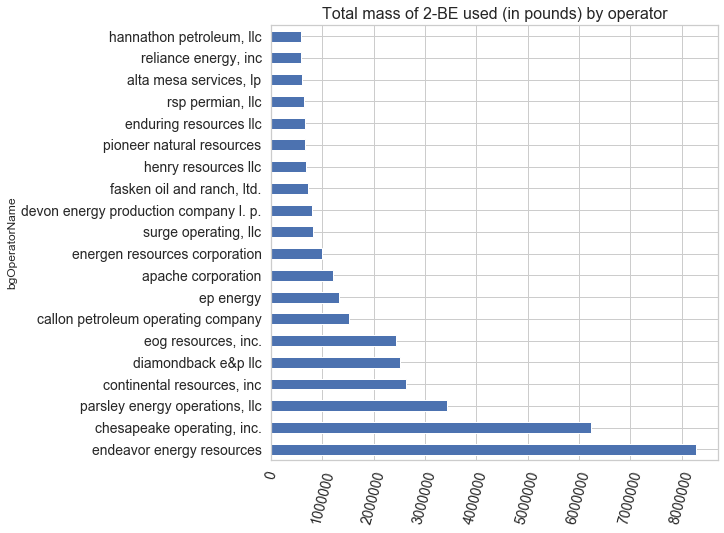

In [17]:
ax =df2be.groupby('bgOperatorName')['bgMass'].sum()\
     .sort_values(ascending=False)[:20].plot.barh(figsize=(8,8));
ax.tick_params(axis="y", labelsize=14)
ax.tick_params(axis="x", labelsize=14,rotation=75)
plt.title('Total mass of 2-BE used (in pounds) by operator',fontsize=16);


## Comparison of 6 operators for quantity used

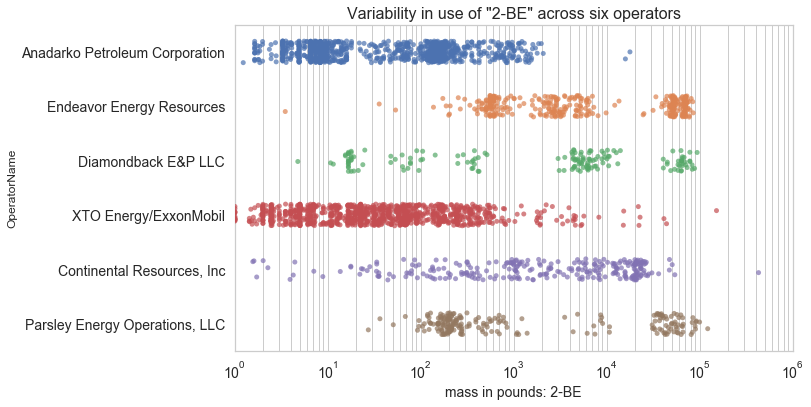

In [18]:
sns.set(style="whitegrid")
ops = ['parsley energy operations, llc','endeavor energy resources','continental resources, inc',
       'anadarko petroleum corporation','xto energy/exxonmobil','diamondback e&p llc']
t = df2be[df2be.bgOperatorName.isin(ops)]
t = t[t.record_flags.str.contains('M')]
fig = plt.figure(figsize=(10,6))
ax = sns.stripplot(t.bgMass,t.OperatorName,jitter=.2,alpha=.7)
plt.xlabel('mass in pounds: 2-BE',fontsize=14);
plt.title('Variability in use of "2-BE" across six operators',fontsize=16)
ax.set(xscale='log')
ax.set(xlim=(1,1000000))
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
locmaj = matplotlib.ticker.LogLocator(base=10,numticks=7,subs='all') 
ax.xaxis.set_major_locator(locmaj)


Reminder: the mass is on a log scale.  Here, each dot represents the mass of 2-BE used in a specific fracking event. Clearly, 2-BE is used by operators in very different ways (or at least quantities).

## Are heavy uses of 2-BE changing over time?

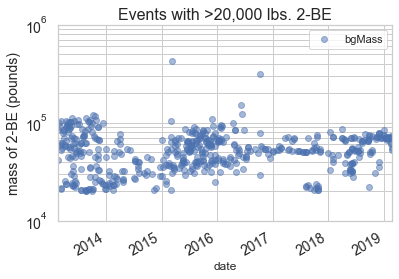

In [19]:
ax=df2be[df2be.bgMass>20000].plot('date','bgMass',style='o',alpha=.5)
plt.ylabel('mass of 2-BE (pounds)',fontsize=14);
plt.title('Events with >20,000 lbs. 2-BE',fontsize=16)
ax.set(yscale='log')
ax.tick_params(axis="y", labelsize=14)
ax.tick_params(axis="x", labelsize=14)
locmaj = matplotlib.ticker.LogLocator(base=10,numticks=7,subs='all') 
ax.yaxis.set_major_locator(locmaj)
ax.set(ylim=(10000,1000000));

## Where are those heavy uses reported?

<Figure size 432x288 with 0 Axes>

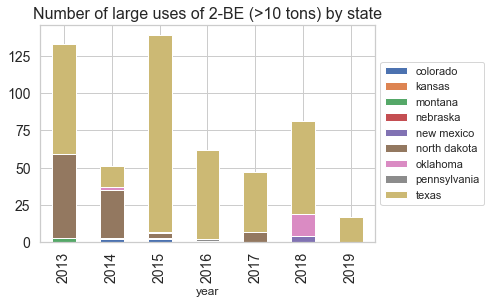

In [20]:
t = df2be[df2be.bgMass>20000].copy()
bg = t.groupby(['year','bgStateName'],as_index=False)['bgMass'].count()
piv = pd.pivot(bg,index='year',columns='bgStateName',values='bgMass')
piv.reset_index(inplace=True)
fig = plt.figure();
ax=piv.plot.bar(x='year',stacked=True);
ax.tick_params(axis="y", labelsize=14)
ax.tick_params(axis="x", labelsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.title('Number of large uses of 2-BE (>10 tons) by state',fontsize=16);


Note that the FracFocus data include latitude and longitude so plotting these data on a map is relatively easy.